In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

## Q1(a)

118it [00:11,  9.95it/s]                                                                                                                                          


Epoch 1 of 100
Generator loss: 1.63287126, Discriminator loss: 0.81464955


118it [00:13,  8.97it/s]                                                                                                                                          


Epoch 2 of 100
Generator loss: 2.53878074, Discriminator loss: 1.21168978


118it [00:13,  8.91it/s]                                                                                                                                          


Epoch 3 of 100
Generator loss: 2.01686342, Discriminator loss: 1.14446997


118it [00:13,  8.97it/s]                                                                                                                                          


Epoch 4 of 100
Generator loss: 2.38220357, Discriminator loss: 1.40819001


118it [00:12,  9.18it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


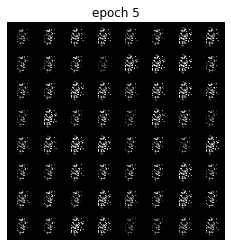

Epoch 5 of 100
Generator loss: 4.90648895, Discriminator loss: 0.79346131


118it [00:13,  8.90it/s]                                                                                                                                          


Epoch 6 of 100
Generator loss: 3.59980798, Discriminator loss: 0.88509700


118it [00:12,  9.13it/s]                                                                                                                                          


Epoch 7 of 100
Generator loss: 1.25187538, Discriminator loss: 1.14178478


118it [00:13,  8.59it/s]                                                                                                                                          


Epoch 8 of 100
Generator loss: 1.35847404, Discriminator loss: 1.31981243


118it [00:13,  8.75it/s]                                                                                                                                          


Epoch 9 of 100
Generator loss: 1.24110756, Discriminator loss: 1.13313288


118it [00:13,  8.92it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


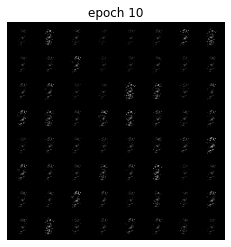

Epoch 10 of 100
Generator loss: 1.16507053, Discriminator loss: 1.11215319


118it [00:13,  8.92it/s]                                                                                                                                          


Epoch 11 of 100
Generator loss: 1.14004142, Discriminator loss: 1.20914668


118it [00:13,  9.00it/s]                                                                                                                                          


Epoch 12 of 100
Generator loss: 1.55102302, Discriminator loss: 1.07590906


118it [00:13,  8.96it/s]                                                                                                                                          


Epoch 13 of 100
Generator loss: 1.28912744, Discriminator loss: 1.00517858


118it [00:13,  8.85it/s]                                                                                                                                          


Epoch 14 of 100
Generator loss: 1.56929999, Discriminator loss: 1.30842325


118it [00:13,  8.99it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


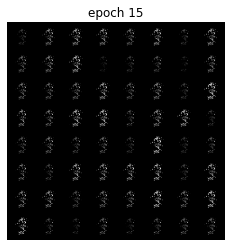

Epoch 15 of 100
Generator loss: 1.13804732, Discriminator loss: 0.99281235


118it [00:13,  9.07it/s]                                                                                                                                          


Epoch 16 of 100
Generator loss: 1.47127843, Discriminator loss: 0.91500392


118it [00:13,  8.53it/s]                                                                                                                                          


Epoch 17 of 100
Generator loss: 1.95213974, Discriminator loss: 0.71717287


118it [00:16,  7.22it/s]                                                                                                                                          


Epoch 18 of 100
Generator loss: 1.79440418, Discriminator loss: 1.00900758


118it [00:13,  8.87it/s]                                                                                                                                          


Epoch 19 of 100
Generator loss: 1.78465929, Discriminator loss: 0.78786872


118it [00:13,  8.95it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


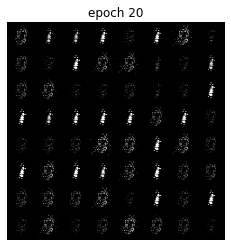

Epoch 20 of 100
Generator loss: 1.93258654, Discriminator loss: 0.84671510


118it [00:13,  8.85it/s]                                                                                                                                          


Epoch 21 of 100
Generator loss: 2.01161019, Discriminator loss: 0.66903449


118it [00:13,  9.01it/s]                                                                                                                                          


Epoch 22 of 100
Generator loss: 2.12856111, Discriminator loss: 0.56213401


118it [00:13,  9.04it/s]                                                                                                                                          


Epoch 23 of 100
Generator loss: 2.25865911, Discriminator loss: 0.62884991


118it [00:13,  9.05it/s]                                                                                                                                          


Epoch 24 of 100
Generator loss: 1.86428088, Discriminator loss: 0.82006845


118it [00:13,  9.02it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


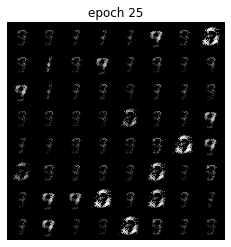

Epoch 25 of 100
Generator loss: 1.92533097, Discriminator loss: 0.84497658


118it [00:13,  8.72it/s]                                                                                                                                          


Epoch 26 of 100
Generator loss: 1.95202113, Discriminator loss: 0.76819088


118it [00:13,  8.90it/s]                                                                                                                                          


Epoch 27 of 100
Generator loss: 2.02784950, Discriminator loss: 0.69644779


118it [00:12,  9.15it/s]                                                                                                                                          


Epoch 28 of 100
Generator loss: 2.13424802, Discriminator loss: 0.79571298


118it [00:13,  8.99it/s]                                                                                                                                          


Epoch 29 of 100
Generator loss: 2.39146350, Discriminator loss: 0.60890660


118it [00:13,  9.07it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


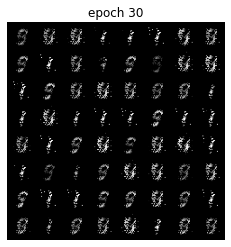

Epoch 30 of 100
Generator loss: 2.27328693, Discriminator loss: 0.84810589


118it [00:13,  9.05it/s]                                                                                                                                          


Epoch 31 of 100
Generator loss: 1.84509585, Discriminator loss: 0.84211218


118it [00:13,  8.92it/s]                                                                                                                                          


Epoch 32 of 100
Generator loss: 1.71956448, Discriminator loss: 0.83653110


118it [00:12,  9.21it/s]                                                                                                                                          


Epoch 33 of 100
Generator loss: 2.21068041, Discriminator loss: 0.71572725


118it [00:13,  8.86it/s]                                                                                                                                          


Epoch 34 of 100
Generator loss: 1.95780488, Discriminator loss: 0.86559634


118it [00:13,  8.97it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


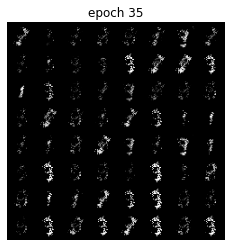

Epoch 35 of 100
Generator loss: 1.81016968, Discriminator loss: 0.83658723


118it [00:13,  8.87it/s]                                                                                                                                          


Epoch 36 of 100
Generator loss: 2.06293498, Discriminator loss: 0.80253716


118it [00:12,  9.13it/s]                                                                                                                                          


Epoch 37 of 100
Generator loss: 1.85069409, Discriminator loss: 0.83026031


118it [00:13,  8.97it/s]                                                                                                                                          


Epoch 38 of 100
Generator loss: 2.30203846, Discriminator loss: 0.68741396


118it [00:12,  9.08it/s]                                                                                                                                          


Epoch 39 of 100
Generator loss: 1.70267277, Discriminator loss: 0.91032237


118it [00:13,  9.06it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


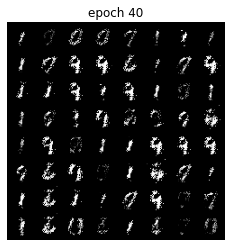

Epoch 40 of 100
Generator loss: 1.54487574, Discriminator loss: 1.01166056


118it [00:13,  9.07it/s]                                                                                                                                          


Epoch 41 of 100
Generator loss: 1.74176193, Discriminator loss: 0.87389121


118it [00:13,  8.98it/s]                                                                                                                                          


Epoch 42 of 100
Generator loss: 1.53121625, Discriminator loss: 0.86519575


118it [00:13,  8.82it/s]                                                                                                                                          


Epoch 43 of 100
Generator loss: 1.76736745, Discriminator loss: 0.88612897


118it [00:13,  8.80it/s]                                                                                                                                          


Epoch 44 of 100
Generator loss: 1.81815156, Discriminator loss: 0.79782519


118it [00:12,  9.12it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


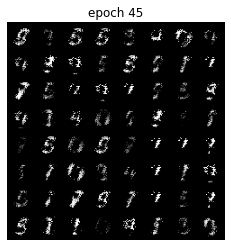

Epoch 45 of 100
Generator loss: 1.88739096, Discriminator loss: 0.88068876


118it [00:13,  8.80it/s]                                                                                                                                          


Epoch 46 of 100
Generator loss: 1.69075972, Discriminator loss: 0.84656405


118it [00:13,  9.01it/s]                                                                                                                                          


Epoch 47 of 100
Generator loss: 1.70382554, Discriminator loss: 0.85942300


118it [00:12,  9.17it/s]                                                                                                                                          


Epoch 48 of 100
Generator loss: 1.95584044, Discriminator loss: 0.80355357


118it [00:13,  9.02it/s]                                                                                                                                          


Epoch 49 of 100
Generator loss: 1.89496582, Discriminator loss: 0.78520849


118it [00:13,  9.06it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


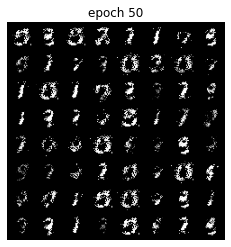

Epoch 50 of 100
Generator loss: 2.11219383, Discriminator loss: 0.75005248


118it [00:12,  9.25it/s]                                                                                                                                          


Epoch 51 of 100
Generator loss: 2.16564398, Discriminator loss: 0.67675570


118it [00:13,  9.04it/s]                                                                                                                                          


Epoch 52 of 100
Generator loss: 2.10297771, Discriminator loss: 0.70936158


118it [00:13,  8.56it/s]                                                                                                                                          


Epoch 53 of 100
Generator loss: 2.20928928, Discriminator loss: 0.74671411


118it [00:13,  9.06it/s]                                                                                                                                          


Epoch 54 of 100
Generator loss: 2.02658257, Discriminator loss: 0.81885336


118it [00:13,  8.89it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


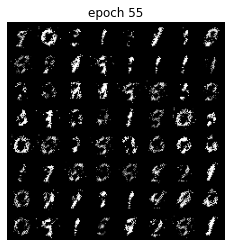

Epoch 55 of 100
Generator loss: 1.80290518, Discriminator loss: 0.80227106


118it [00:13,  8.88it/s]                                                                                                                                          


Epoch 56 of 100
Generator loss: 1.98178635, Discriminator loss: 0.83297116


118it [00:12,  9.09it/s]                                                                                                                                          


Epoch 57 of 100
Generator loss: 2.03866939, Discriminator loss: 0.80340895


118it [00:13,  8.96it/s]                                                                                                                                          


Epoch 58 of 100
Generator loss: 2.11941014, Discriminator loss: 0.77549657


118it [00:13,  9.03it/s]                                                                                                                                          


Epoch 59 of 100
Generator loss: 2.00124084, Discriminator loss: 0.81101164


118it [00:12,  9.15it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


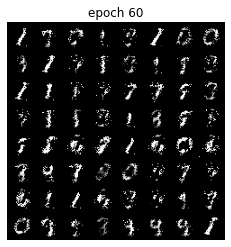

Epoch 60 of 100
Generator loss: 2.03554979, Discriminator loss: 0.78183873


118it [00:13,  9.08it/s]                                                                                                                                          


Epoch 61 of 100
Generator loss: 2.20817016, Discriminator loss: 0.71165718


118it [00:13,  8.72it/s]                                                                                                                                          


Epoch 62 of 100
Generator loss: 2.18689294, Discriminator loss: 0.75142244


118it [00:13,  8.81it/s]                                                                                                                                          


Epoch 63 of 100
Generator loss: 2.65204380, Discriminator loss: 0.66913209


118it [00:13,  8.69it/s]                                                                                                                                          


Epoch 64 of 100
Generator loss: 2.38370237, Discriminator loss: 0.67292642


118it [00:15,  7.41it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


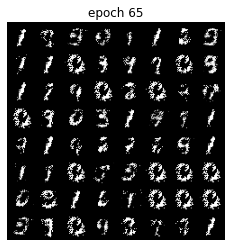

Epoch 65 of 100
Generator loss: 2.83222763, Discriminator loss: 0.58312227


118it [00:13,  8.53it/s]                                                                                                                                          


Epoch 66 of 100
Generator loss: 3.00214402, Discriminator loss: 0.58987786


118it [00:13,  8.57it/s]                                                                                                                                          


Epoch 67 of 100
Generator loss: 2.85190969, Discriminator loss: 0.60430902


118it [00:12,  9.11it/s]                                                                                                                                          


Epoch 68 of 100
Generator loss: 2.94927004, Discriminator loss: 0.57253108


118it [00:12,  9.10it/s]                                                                                                                                          


Epoch 69 of 100
Generator loss: 3.09757385, Discriminator loss: 0.55317388


118it [00:13,  8.94it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


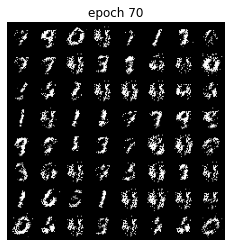

Epoch 70 of 100
Generator loss: 3.56487599, Discriminator loss: 0.47286738


118it [00:13,  8.71it/s]                                                                                                                                          


Epoch 71 of 100
Generator loss: 3.46783710, Discriminator loss: 0.48802524


118it [00:13,  8.95it/s]                                                                                                                                          


Epoch 72 of 100
Generator loss: 3.57673376, Discriminator loss: 0.46002590


118it [00:13,  8.88it/s]                                                                                                                                          


Epoch 73 of 100
Generator loss: 3.43653112, Discriminator loss: 0.45544218


118it [00:13,  8.90it/s]                                                                                                                                          


Epoch 74 of 100
Generator loss: 3.70065715, Discriminator loss: 0.42745130


118it [00:13,  8.75it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


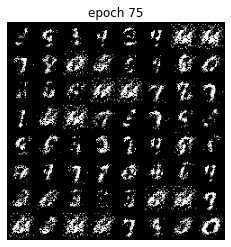

Epoch 75 of 100
Generator loss: 3.23917096, Discriminator loss: 0.51167493


118it [00:13,  8.90it/s]                                                                                                                                          


Epoch 76 of 100
Generator loss: 3.33276968, Discriminator loss: 0.49959946


118it [00:16,  7.14it/s]                                                                                                                                          


Epoch 77 of 100
Generator loss: 3.61225630, Discriminator loss: 0.47236545


118it [00:15,  7.67it/s]                                                                                                                                          


Epoch 78 of 100
Generator loss: 2.88246908, Discriminator loss: 0.57473103


118it [00:13,  9.07it/s]                                                                                                                                          


Epoch 79 of 100
Generator loss: 2.91379224, Discriminator loss: 0.59413339


118it [00:12,  9.32it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


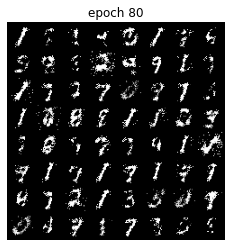

Epoch 80 of 100
Generator loss: 2.90441602, Discriminator loss: 0.56312910


118it [00:13,  8.77it/s]                                                                                                                                          


Epoch 81 of 100
Generator loss: 2.83922781, Discriminator loss: 0.59627644


118it [00:13,  8.94it/s]                                                                                                                                          


Epoch 82 of 100
Generator loss: 2.74784458, Discriminator loss: 0.61414548


118it [00:13,  8.64it/s]                                                                                                                                          


Epoch 83 of 100
Generator loss: 2.36572175, Discriminator loss: 0.71119360


118it [00:13,  8.79it/s]                                                                                                                                          


Epoch 84 of 100
Generator loss: 2.09345791, Discriminator loss: 0.76773306


118it [00:12,  9.15it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


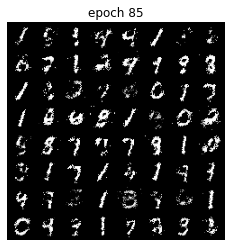

Epoch 85 of 100
Generator loss: 2.19135685, Discriminator loss: 0.74637672


118it [00:13,  8.92it/s]                                                                                                                                          


Epoch 86 of 100
Generator loss: 1.89495128, Discriminator loss: 0.83710965


118it [00:13,  8.55it/s]                                                                                                                                          


Epoch 87 of 100
Generator loss: 1.78790408, Discriminator loss: 0.87316281


118it [00:13,  9.04it/s]                                                                                                                                          


Epoch 88 of 100
Generator loss: 1.82982270, Discriminator loss: 0.85133821


118it [00:13,  8.74it/s]                                                                                                                                          


Epoch 89 of 100
Generator loss: 1.80141160, Discriminator loss: 0.86191594


118it [00:13,  8.62it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


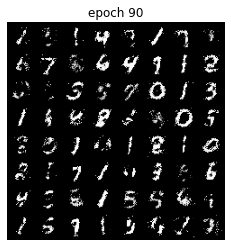

Epoch 90 of 100
Generator loss: 1.74790545, Discriminator loss: 0.88356292


118it [00:12,  9.14it/s]                                                                                                                                          


Epoch 91 of 100
Generator loss: 1.77875991, Discriminator loss: 0.90086725


118it [00:13,  8.71it/s]                                                                                                                                          


Epoch 92 of 100
Generator loss: 1.79440529, Discriminator loss: 0.86311744


118it [00:13,  8.43it/s]                                                                                                                                          


Epoch 93 of 100
Generator loss: 1.64132061, Discriminator loss: 0.93725171


118it [00:13,  8.66it/s]                                                                                                                                          


Epoch 94 of 100
Generator loss: 1.60880661, Discriminator loss: 0.93412533


118it [00:19,  6.02it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


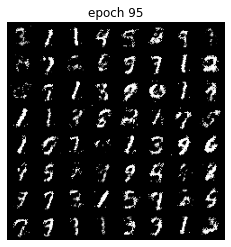

Epoch 95 of 100
Generator loss: 1.63882486, Discriminator loss: 0.90954458


118it [00:15,  7.53it/s]                                                                                                                                          


Epoch 96 of 100
Generator loss: 1.68014111, Discriminator loss: 0.88358721


118it [00:13,  8.70it/s]                                                                                                                                          


Epoch 97 of 100
Generator loss: 1.66465393, Discriminator loss: 0.87873976


118it [00:13,  8.74it/s]                                                                                                                                          


Epoch 98 of 100
Generator loss: 1.69284493, Discriminator loss: 0.88259304


118it [00:13,  8.90it/s]                                                                                                                                          


Epoch 99 of 100
Generator loss: 1.57792785, Discriminator loss: 0.95233918


118it [00:14,  8.14it/s]                                                                                                                                          
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


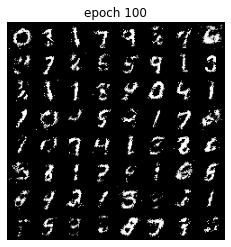

Epoch 100 of 100
Generator loss: 1.54336680, Discriminator loss: 0.94266194


In [15]:
torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        _images, _ = data
        _images=_images[:sample_size,:,:,:]
        current_batch_size = _images.size(0)  # Get the current batch size

        # Labels for real and fake data
        real_labels = label_real(current_batch_size)
        fake_labels = label_fake(current_batch_size)

        _images = _images.to(device)

        # Train Discriminator with real images
        optim_d.zero_grad()
        outputs_real = discriminator(_images)
        loss_d_real = criterion(outputs_real, real_labels)

        # Generate fake images and train Discriminator
        fake_images = generator(noise)
        outputs_fake = discriminator(fake_images.detach())
        loss_d_fake = criterion(outputs_fake, fake_labels)

        # Combine losses and update Discriminator
        _loss_d = loss_d_real + loss_d_fake
        _loss_d.backward()
        optim_d.step()

        # Train Generator
        optim_g.zero_grad()
        outputs_fake = discriminator(fake_images)
        _loss_g = criterion(outputs_fake, real_labels)
        _loss_g.backward()
        optim_g.step()

        loss_g += _loss_g.item()
        loss_d += _loss_d.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

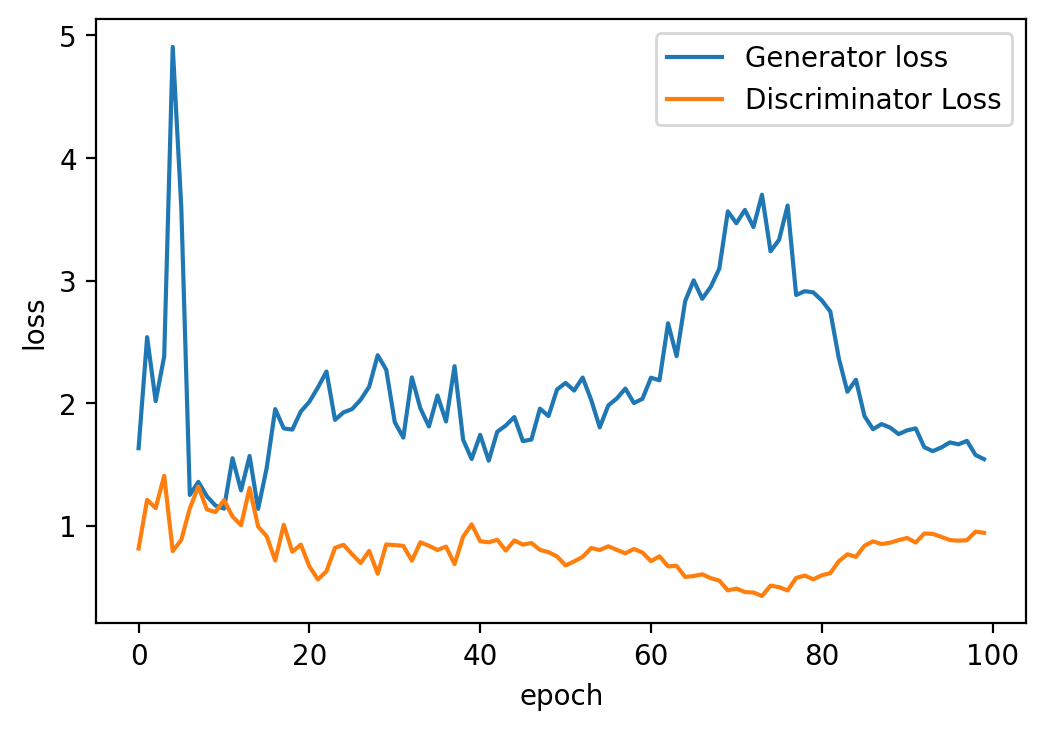

In [16]:
# plot and save the generator and discriminator loss
plt.figure(dpi=200)
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('outputs/loss.png')

## Q1(b)

In [ ]:
torch.manual_seed(7777)

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        _images, _ = data
        _images=_images[:sample_size,:,:,:]
        current_batch_size = _images.size(0)  # Get the current batch size

        # Labels for real and fake data
        real_labels = label_real(current_batch_size)
        fake_labels = label_fake(current_batch_size)

        _images = _images.to(device)

        # Train Discriminator with real images
        optim_d.zero_grad()
        outputs_real = discriminator(_images)
        loss_d_real = criterion(outputs_real, real_labels)

        # Generate fake images and train Discriminator
        fake_images = generator(noise)
        outputs_fake = discriminator(fake_images.detach())
        loss_d_fake = criterion(outputs_fake, fake_labels)

        # Combine losses and update Discriminator
        _loss_d = loss_d_real + loss_d_fake
        _loss_d.backward()
        optim_d.step()

        # Train Generator
        optim_g.zero_grad()
        outputs_fake = discriminator(fake_images)
        _loss_g = criterion(outputs_fake, fake_labels)
        _loss_g.backward()
        optim_g.step()

        loss_g += _loss_g.item()
        loss_d += _loss_d.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

118it [00:13,  8.80it/s]                                                                                                                                                           


Epoch 1 of 100
Generator loss: 0.00005571, Discriminator loss: 0.00005638


118it [00:13,  8.63it/s]                                                                                                                                                           


Epoch 2 of 100
Generator loss: 0.00003862, Discriminator loss: 0.00003935


118it [00:15,  7.71it/s]                                                                                                                                                           


Epoch 3 of 100
Generator loss: 0.00002933, Discriminator loss: 0.00002964


118it [00:15,  7.65it/s]                                                                                                                                                           


Epoch 4 of 100
Generator loss: 0.00002219, Discriminator loss: 0.00002201


 31%|███████████████████████████████████████████▍                                                                                                 | 36/117 [00:05<00:11,  7.16it/s]

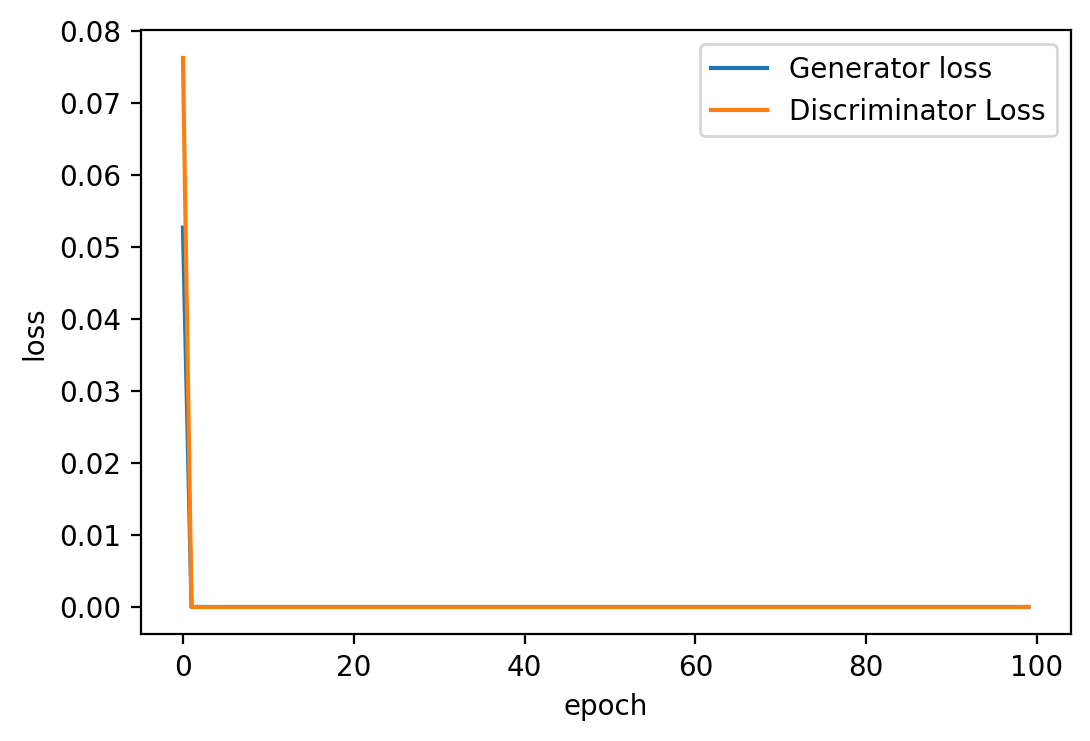

In [27]:
# plot and save the generator and discriminator loss
plt.figure(dpi=200)
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('outputs/loss.png')

## Q1(c)

118it [00:14,  7.89it/s]                                                                                                                                                     


Epoch 1 of 100
Generator loss: 0.58529323, Discriminator loss: 0.22444205


118it [00:14,  8.29it/s]                                                                                                                                                     


Epoch 2 of 100
Generator loss: 0.87842823, Discriminator loss: 0.12046017


118it [00:16,  6.99it/s]                                                                                                                                                     


Epoch 3 of 100
Generator loss: 0.71153789, Discriminator loss: 0.21630170


118it [00:20,  5.90it/s]                                                                                                                                                     


Epoch 4 of 100
Generator loss: 0.84879564, Discriminator loss: 0.14571741


118it [00:13,  8.52it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


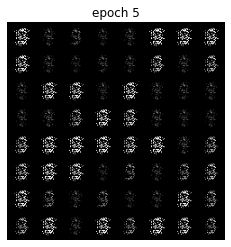

Epoch 5 of 100
Generator loss: 0.71979300, Discriminator loss: 0.27044754


118it [00:12,  9.22it/s]                                                                                                                                                     


Epoch 6 of 100
Generator loss: 0.55251106, Discriminator loss: 0.34127200


118it [00:13,  8.47it/s]                                                                                                                                                     


Epoch 7 of 100
Generator loss: 0.33472074, Discriminator loss: 0.48536466


118it [00:13,  8.50it/s]                                                                                                                                                     


Epoch 8 of 100
Generator loss: 0.45375591, Discriminator loss: 0.49239474


118it [00:14,  8.28it/s]                                                                                                                                                     


Epoch 9 of 100
Generator loss: 0.48334453, Discriminator loss: 0.37384957


118it [00:14,  8.23it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


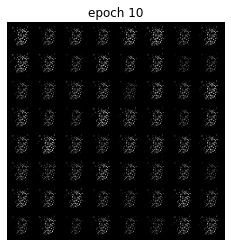

Epoch 10 of 100
Generator loss: 0.40908913, Discriminator loss: 0.42762379


118it [00:13,  8.70it/s]                                                                                                                                                     


Epoch 11 of 100
Generator loss: 0.35714962, Discriminator loss: 0.49010274


118it [00:13,  8.56it/s]                                                                                                                                                     


Epoch 12 of 100
Generator loss: 0.37752262, Discriminator loss: 0.44424331


118it [00:15,  7.81it/s]                                                                                                                                                     


Epoch 13 of 100
Generator loss: 0.52681673, Discriminator loss: 0.36383930


118it [00:15,  7.56it/s]                                                                                                                                                     


Epoch 14 of 100
Generator loss: 0.59876243, Discriminator loss: 0.34779911


118it [00:14,  8.06it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


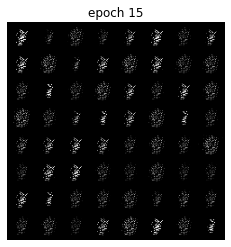

Epoch 15 of 100
Generator loss: 0.63819225, Discriminator loss: 0.28092601


118it [00:13,  8.76it/s]                                                                                                                                                     


Epoch 16 of 100
Generator loss: 0.73554460, Discriminator loss: 0.25946431


118it [00:12,  9.10it/s]                                                                                                                                                     


Epoch 17 of 100
Generator loss: 0.75645120, Discriminator loss: 0.21709164


118it [00:13,  8.45it/s]                                                                                                                                                     


Epoch 18 of 100
Generator loss: 0.82000702, Discriminator loss: 0.16203930


118it [00:14,  8.39it/s]                                                                                                                                                     


Epoch 19 of 100
Generator loss: 0.77886044, Discriminator loss: 0.20498272


118it [00:18,  6.32it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


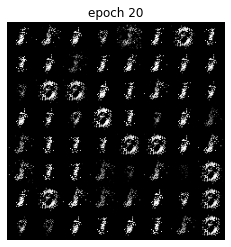

Epoch 20 of 100
Generator loss: 0.77317322, Discriminator loss: 0.20187775


118it [00:14,  7.91it/s]                                                                                                                                                     


Epoch 21 of 100
Generator loss: 0.73356484, Discriminator loss: 0.21862928


118it [00:15,  7.56it/s]                                                                                                                                                     


Epoch 22 of 100
Generator loss: 0.73349999, Discriminator loss: 0.25470871


118it [00:12,  9.42it/s]                                                                                                                                                     


Epoch 23 of 100
Generator loss: 0.74912579, Discriminator loss: 0.23199391


118it [00:15,  7.38it/s]                                                                                                                                                     


Epoch 24 of 100
Generator loss: 0.75033547, Discriminator loss: 0.20930164


118it [00:11,  9.90it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


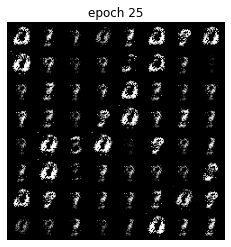

Epoch 25 of 100
Generator loss: 0.79336755, Discriminator loss: 0.21172049


118it [00:13,  8.73it/s]                                                                                                                                                     


Epoch 26 of 100
Generator loss: 0.75672686, Discriminator loss: 0.23607435


118it [00:13,  8.60it/s]                                                                                                                                                     


Epoch 27 of 100
Generator loss: 0.72473080, Discriminator loss: 0.24353731


118it [00:12,  9.28it/s]                                                                                                                                                     


Epoch 28 of 100
Generator loss: 0.67709115, Discriminator loss: 0.30542457


118it [00:13,  8.97it/s]                                                                                                                                                     


Epoch 29 of 100
Generator loss: 0.66186661, Discriminator loss: 0.28431814


118it [00:13,  8.82it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


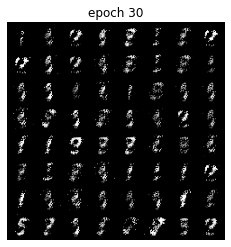

Epoch 30 of 100
Generator loss: 0.63528159, Discriminator loss: 0.32550104


118it [00:13,  9.05it/s]                                                                                                                                                     


Epoch 31 of 100
Generator loss: 0.61272606, Discriminator loss: 0.33514915


118it [00:12,  9.25it/s]                                                                                                                                                     


Epoch 32 of 100
Generator loss: 0.63713572, Discriminator loss: 0.31587592


118it [00:13,  9.00it/s]                                                                                                                                                     


Epoch 33 of 100
Generator loss: 0.65538215, Discriminator loss: 0.29496586


118it [00:13,  8.82it/s]                                                                                                                                                     


Epoch 34 of 100
Generator loss: 0.62602196, Discriminator loss: 0.32503476


118it [00:12,  9.33it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


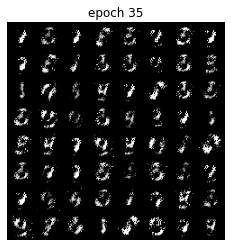

Epoch 35 of 100
Generator loss: 0.65268004, Discriminator loss: 0.31151747


118it [00:14,  8.10it/s]                                                                                                                                                     


Epoch 36 of 100
Generator loss: 0.61916159, Discriminator loss: 0.29551699


118it [00:15,  7.57it/s]                                                                                                                                                     


Epoch 37 of 100
Generator loss: 0.63441914, Discriminator loss: 0.28913297


118it [00:14,  8.37it/s]                                                                                                                                                     


Epoch 38 of 100
Generator loss: 0.64782372, Discriminator loss: 0.32811310


118it [00:14,  8.23it/s]                                                                                                                                                     


Epoch 39 of 100
Generator loss: 0.65283707, Discriminator loss: 0.27134658


118it [00:15,  7.77it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


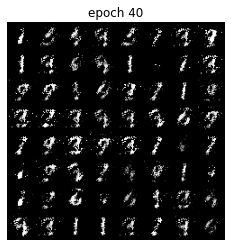

Epoch 40 of 100
Generator loss: 0.64185144, Discriminator loss: 0.29830615


118it [00:12,  9.78it/s]                                                                                                                                                     


Epoch 41 of 100
Generator loss: 0.57384487, Discriminator loss: 0.36011366


118it [00:13,  8.56it/s]                                                                                                                                                     


Epoch 42 of 100
Generator loss: 0.67589440, Discriminator loss: 0.26134934


118it [00:16,  7.15it/s]                                                                                                                                                     


Epoch 43 of 100
Generator loss: 0.56900991, Discriminator loss: 0.32991224


118it [00:16,  7.02it/s]                                                                                                                                                     


Epoch 44 of 100
Generator loss: 0.58015455, Discriminator loss: 0.34378257


118it [00:14,  8.26it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


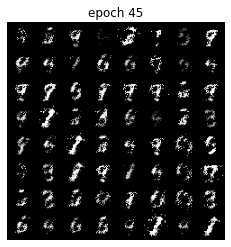

Epoch 45 of 100
Generator loss: 0.54770713, Discriminator loss: 0.35095998


118it [00:12,  9.27it/s]                                                                                                                                                     


Epoch 46 of 100
Generator loss: 0.54412808, Discriminator loss: 0.32813265


118it [00:15,  7.63it/s]                                                                                                                                                     


Epoch 47 of 100
Generator loss: 0.55299931, Discriminator loss: 0.34847735


118it [00:13,  8.45it/s]                                                                                                                                                     


Epoch 48 of 100
Generator loss: 0.56151565, Discriminator loss: 0.33557625


118it [00:12,  9.60it/s]                                                                                                                                                     


Epoch 49 of 100
Generator loss: 0.54524164, Discriminator loss: 0.32545006


118it [00:12,  9.48it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


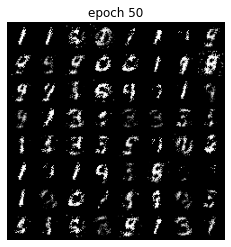

Epoch 50 of 100
Generator loss: 0.53915103, Discriminator loss: 0.33663743


118it [00:11,  9.95it/s]                                                                                                                                                     


Epoch 51 of 100
Generator loss: 0.51643439, Discriminator loss: 0.34942165


118it [00:12,  9.70it/s]                                                                                                                                                     


Epoch 52 of 100
Generator loss: 0.54378953, Discriminator loss: 0.33128013


118it [00:13,  8.63it/s]                                                                                                                                                     


Epoch 53 of 100
Generator loss: 0.52123675, Discriminator loss: 0.35891476


118it [00:12,  9.25it/s]                                                                                                                                                     


Epoch 54 of 100
Generator loss: 0.55468677, Discriminator loss: 0.32881087


118it [00:12,  9.59it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


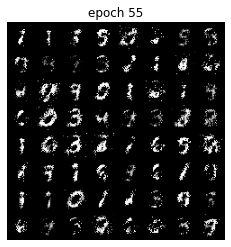

Epoch 55 of 100
Generator loss: 0.56636522, Discriminator loss: 0.32838229


118it [00:12,  9.52it/s]                                                                                                                                                     


Epoch 56 of 100
Generator loss: 0.55800668, Discriminator loss: 0.32063757


118it [00:12,  9.80it/s]                                                                                                                                                     


Epoch 57 of 100
Generator loss: 0.56099212, Discriminator loss: 0.32130837


118it [00:12,  9.46it/s]                                                                                                                                                     


Epoch 58 of 100
Generator loss: 0.59938675, Discriminator loss: 0.29415901


118it [00:12,  9.15it/s]                                                                                                                                                     


Epoch 59 of 100
Generator loss: 0.58671316, Discriminator loss: 0.30579406


118it [00:12,  9.72it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


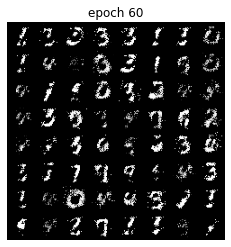

Epoch 60 of 100
Generator loss: 0.59587281, Discriminator loss: 0.31317305


118it [00:12,  9.60it/s]                                                                                                                                                     


Epoch 61 of 100
Generator loss: 0.58504565, Discriminator loss: 0.30969648


118it [00:12,  9.19it/s]                                                                                                                                                     


Epoch 62 of 100
Generator loss: 0.57773385, Discriminator loss: 0.30596654


118it [00:12,  9.76it/s]                                                                                                                                                     


Epoch 63 of 100
Generator loss: 0.61323457, Discriminator loss: 0.28335950


118it [00:12,  9.20it/s]                                                                                                                                                     


Epoch 64 of 100
Generator loss: 0.64172661, Discriminator loss: 0.26782446


118it [00:12,  9.10it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


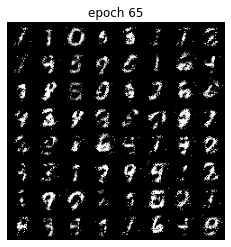

Epoch 65 of 100
Generator loss: 0.62231210, Discriminator loss: 0.27338545


118it [00:11,  9.93it/s]                                                                                                                                                     


Epoch 66 of 100
Generator loss: 0.59899865, Discriminator loss: 0.28241663


118it [00:11, 10.30it/s]                                                                                                                                                     


Epoch 67 of 100
Generator loss: 0.63737574, Discriminator loss: 0.29049991


118it [00:12,  9.46it/s]                                                                                                                                                     


Epoch 68 of 100
Generator loss: 0.64481789, Discriminator loss: 0.26484072


118it [00:12,  9.60it/s]                                                                                                                                                     


Epoch 69 of 100
Generator loss: 0.59920857, Discriminator loss: 0.29449210


118it [00:12,  9.15it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


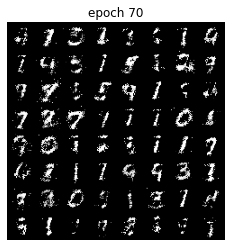

Epoch 70 of 100
Generator loss: 0.63791069, Discriminator loss: 0.26503792


118it [00:12,  9.27it/s]                                                                                                                                                     


Epoch 71 of 100
Generator loss: 0.62246718, Discriminator loss: 0.27389244


118it [00:12,  9.22it/s]                                                                                                                                                     


Epoch 72 of 100
Generator loss: 0.57272853, Discriminator loss: 0.33464729


118it [00:13,  8.69it/s]                                                                                                                                                     


Epoch 73 of 100
Generator loss: 0.60055664, Discriminator loss: 0.30807493


118it [00:12,  9.80it/s]                                                                                                                                                     


Epoch 74 of 100
Generator loss: 0.58991057, Discriminator loss: 0.31241876


118it [00:12,  9.81it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


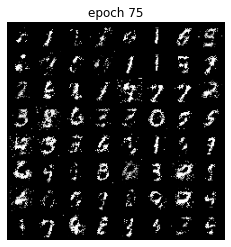

Epoch 75 of 100
Generator loss: 0.56987832, Discriminator loss: 0.30358661


118it [00:12,  9.35it/s]                                                                                                                                                     


Epoch 76 of 100
Generator loss: 0.60689267, Discriminator loss: 0.30442118


118it [00:13,  8.78it/s]                                                                                                                                                     


Epoch 77 of 100
Generator loss: 0.57473077, Discriminator loss: 0.31671966


118it [00:12,  9.73it/s]                                                                                                                                                     


Epoch 78 of 100
Generator loss: 0.54320061, Discriminator loss: 0.33846767


118it [00:12,  9.60it/s]                                                                                                                                                     


Epoch 79 of 100
Generator loss: 0.56297977, Discriminator loss: 0.31188850


118it [00:15,  7.54it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


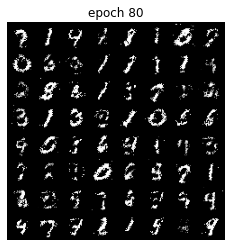

Epoch 80 of 100
Generator loss: 0.55993536, Discriminator loss: 0.32473853


118it [00:22,  5.31it/s]                                                                                                                                                     


Epoch 81 of 100
Generator loss: 0.55768389, Discriminator loss: 0.33258270


118it [00:14,  8.06it/s]                                                                                                                                                     


Epoch 82 of 100
Generator loss: 0.51176591, Discriminator loss: 0.35500144


118it [00:13,  8.81it/s]                                                                                                                                                     


Epoch 83 of 100
Generator loss: 0.53656907, Discriminator loss: 0.34055449


118it [00:12,  9.46it/s]                                                                                                                                                     


Epoch 84 of 100
Generator loss: 0.53648422, Discriminator loss: 0.33406130


118it [00:15,  7.44it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


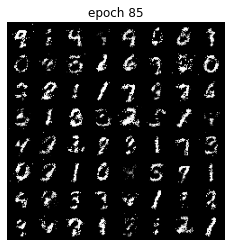

Epoch 85 of 100
Generator loss: 0.53115345, Discriminator loss: 0.33921127


118it [00:12,  9.56it/s]                                                                                                                                                     


Epoch 86 of 100
Generator loss: 0.48706488, Discriminator loss: 0.37289138


118it [00:15,  7.83it/s]                                                                                                                                                     


Epoch 87 of 100
Generator loss: 0.53149441, Discriminator loss: 0.33793020


118it [00:15,  7.79it/s]                                                                                                                                                     


Epoch 88 of 100
Generator loss: 0.53183688, Discriminator loss: 0.34130899


118it [00:14,  8.17it/s]                                                                                                                                                     


Epoch 89 of 100
Generator loss: 0.55776911, Discriminator loss: 0.31578112


118it [00:16,  7.03it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


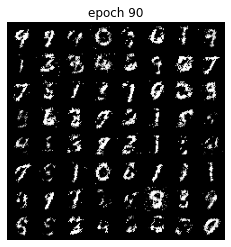

Epoch 90 of 100
Generator loss: 0.57380579, Discriminator loss: 0.31716603


118it [00:14,  7.99it/s]                                                                                                                                                     


Epoch 91 of 100
Generator loss: 0.53429243, Discriminator loss: 0.33337009


118it [00:13,  8.58it/s]                                                                                                                                                     


Epoch 92 of 100
Generator loss: 0.50718672, Discriminator loss: 0.35047201


118it [00:14,  7.93it/s]                                                                                                                                                     


Epoch 93 of 100
Generator loss: 0.52891607, Discriminator loss: 0.34195019


118it [00:12,  9.50it/s]                                                                                                                                                     


Epoch 94 of 100
Generator loss: 0.53086718, Discriminator loss: 0.34150235


118it [00:12,  9.70it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


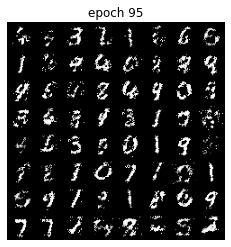

Epoch 95 of 100
Generator loss: 0.55258573, Discriminator loss: 0.32223222


118it [00:12,  9.20it/s]                                                                                                                                                     


Epoch 96 of 100
Generator loss: 0.56732216, Discriminator loss: 0.31427211


118it [00:13,  9.00it/s]                                                                                                                                                     


Epoch 97 of 100
Generator loss: 0.53134567, Discriminator loss: 0.34185584


118it [00:13,  8.82it/s]                                                                                                                                                     


Epoch 98 of 100
Generator loss: 0.50230593, Discriminator loss: 0.35896757


118it [00:13,  9.06it/s]                                                                                                                                                     


Epoch 99 of 100
Generator loss: 0.54218689, Discriminator loss: 0.32753488


118it [00:13,  8.62it/s]                                                                                                                                                     
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


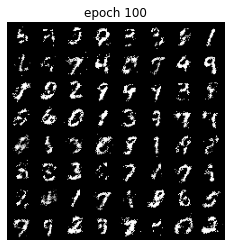

Epoch 100 of 100
Generator loss: 0.52328973, Discriminator loss: 0.34609784


In [14]:
torch.manual_seed(7777)


for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        
        _images, _ = data
        _images=_images[:sample_size,:,:,:]
        _images = _images.to(device)

        # Train Discriminator with real images
        optim_d.zero_grad()
        outputs_real = discriminator(_images)
        loss_d_real = ((outputs_real - 1) ** 2).mean()

        # Generate fake images and train Discriminator
        fake_images = generator(noise)
        outputs_fake = discriminator(fake_images.detach())
        loss_d_fake = ((outputs_fake - 0) ** 2).mean()

        # Combine losses and update Discriminator
        _loss_d = loss_d_real + loss_d_fake
        _loss_d.backward()
        optim_d.step()

        # Train Generator
        optim_g.zero_grad()
        outputs_fake = discriminator(fake_images)
        _loss_g = ((outputs_fake - 1) ** 2).mean()
        _loss_g.backward()
        optim_g.step()

        loss_g += _loss_g.item()
        loss_d += _loss_d.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

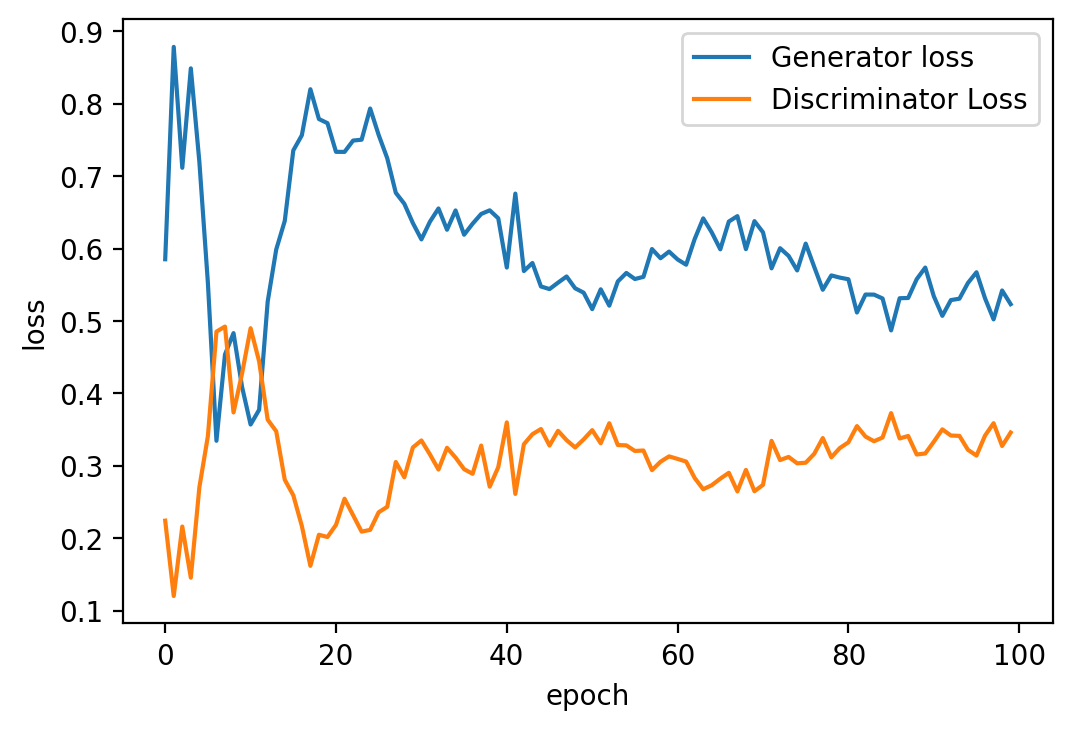

In [15]:
# plot and save the generator and discriminator loss
plt.figure(dpi=200)
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('outputs/loss.png')